# Otoczka wypukła

In [1]:
import numpy as np
import pandas as pd
from bitalg.visualizer.main import Visualizer

In [2]:
def direction(a, b, c):
    return (a[0] - c[0]) * (b[1] - c[1]) - ((a[1] - c[1]) * (b[0] - c[0]))

def distance_squared(point1, point2):
    return (point1[0] - point2[0])**2 + (point1[1] - point2[1])**2

## Zbiory testowe

### Zbiór a

In [3]:
np.random.seed(88)

def generate_uniform_points(left=-100, right=100, n=100):
    """
    Funkcja generuje równomiernie n punktów na kwadwratowym
    obszarze od left do right (jednakowo na osi y)
    o współrzędnych rzeczywistych
    :param left: lewy kraniec przedziału
    :param right: prawy kraniec przedziału
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
             np. [(x1, y1), (x2, y2), ... (xn, yn)]
    """
    points = []
    for i in range(n):
        x = np.random.uniform(left, right)
        y = np.random.uniform(left, right)
        points.append((x, y))

    return points

In [4]:
points_a = generate_uniform_points(-100, 100, 100)

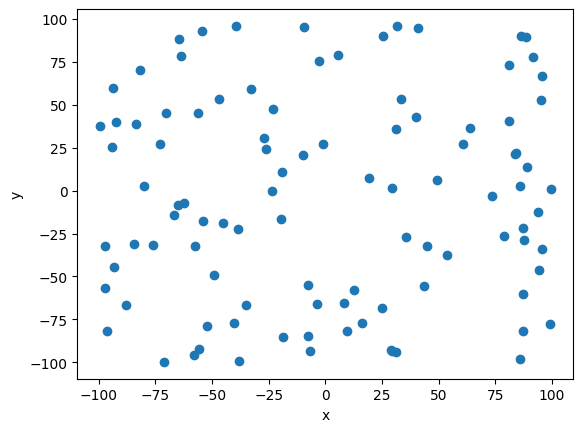

In [5]:
# visualize(points_a)
vis = Visualizer()
vis.add_point(points_a)
vis.show()

### Zbiór b

In [6]:
def generate_circle_points(O, R, n=100):
    """
    Funkcja generuje jednostajnie n punktów na okręgu o środku O i promieniu R
    :param O: krotka współrzędnych x, y określająca środek okręgu
    :param R: promień okręgu
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    points = []
    for i in range(n):
        angle = 2 * np.pi * np.random.uniform()
        points.append((R * np.cos(angle) + O[0], R * np.sin(angle) + O[1]))
    return points

In [7]:
points_b = generate_circle_points((0, 0), 10, 100)

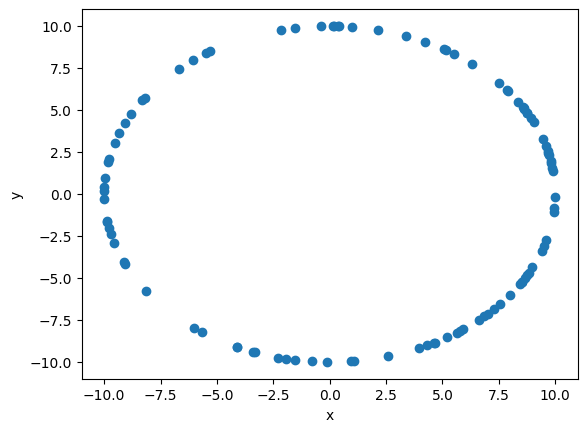

In [8]:
vis.clear()
vis.add_point(points_b)
vis.show()

### Zbiór c

In [9]:
def generate_rectangle_points(a=(-10, -10), b=(10, -10), c=(10, 10), d=(-10, 10), n=100):
    '''
    Funkcja generuje n punktów na obwodzie prostokąta
    o wierzchołkach w punktach a, b, c i d
    :param a: lewy-dolny wierzchołek prostokąta
    :param b: prawy-dolny wierzchołek prostokąta
    :param c: prawy-górny wierzchołek prostokąta
    :param d: lewy-górny wierzchołek prostokąta
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    '''
    points = [a,b,c,d]

    for i in range(n):
        x = np.random.uniform(a[0], b[0])
        y = a[1]
        points.append((x, y))
        x = a[0]
        y = np.random.uniform(a[1], d[1])
        points.append((x, y))
        x = np.random.uniform(a[0], b[0])
        y = c[1]
        points.append((x, y))
        x = b[0]
        y = np.random.uniform(a[1], d[1])
        points.append((x, y))

    
    return points

In [10]:
points_c = generate_rectangle_points(
    (-10, -10), (10, -10), (10, 10), (-10, 10), 100)

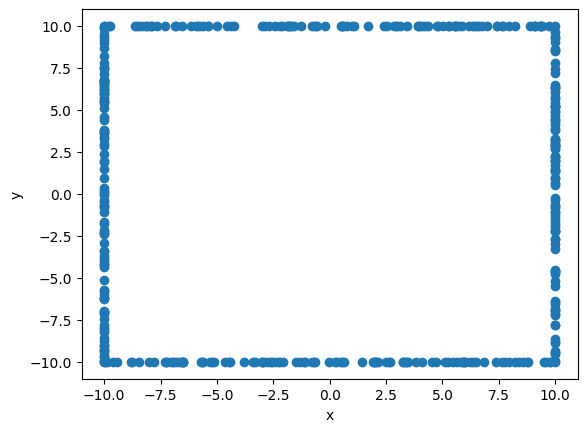

In [11]:
vis.clear()
vis.add_point(points_c)
vis.show()

### Zbiór d

In [12]:
def generate_square_points(a=(0, 0), b=(10, 0), c=(10, 10), d=(0, 10),
                           axis_n=25, diag_n=20):
    '''
    Funkcja generuje axis_n punktów na dwóch bokach kwadratu
    leżących na osiach x i y oraz diag_n punktów na
    przektąnych kwadratu, którego wyznaczają punkty
    a, b, c i d.
    :param a: lewy-dolny wierzchołek kwadratu
    :param b: prawy-dolny wierzchołek kwadratu
    :param c: prawy-górny wierzchołek kwadratu
    :param d: lewy-górny wierzchołek kwadratu
    :param axis_n: ilość generowanych punktów na każdym
                   z dwóch boków kwadratu równoległych do osi x i y
    :param diag_n: ilość generowanych punktów na każdej
                   przekątnej kwadratu
    :return: tablica punktów w postaci krotek współrzędnych
    '''

    points = [a,b,c,d]

    for i in range(axis_n):
        x = np.random.uniform(a[0], b[0])
        y = a[1]
        points.append((x, y))
        x = a[0]
        y = np.random.uniform(a[1], d[1])
        points.append((x, y))

    for i in range(diag_n):
        x = np.random.uniform(a[0], c[0])
        y = x + a[1]
        points.append((x, y))
        x = np.random.uniform(d[0], b[0])
        y = d[1] - x
        points.append((x, y))
    return points

In [13]:
points_d = generate_square_points(
    (0, 0), (10, 0), (10, 10), (0, 10), 25, 20)

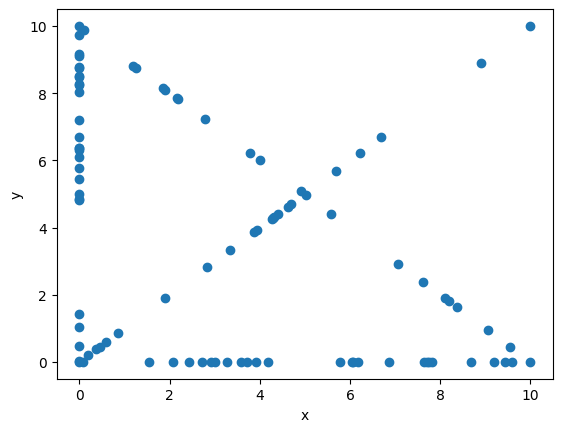

In [14]:
vis.clear()
vis.add_point(points_d)
vis.show()

## Algorytm Grahama

In [15]:
def graham_algorithm(points):
    '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów points algorymem Grahama
    :parm points: zbiór punktów
    :return: tablica punktów w postaci krotek współrzędnych
    '''
    eps = 10**-18
    n = len(points)
    
    a = points.index(min(points, key = lambda point: (point[1], points[0])))
    points[0], points[a] = points[a], points[0]

    a = points[0]

    quickSort(points, 0 , n-1, a)
    if n < 3: return points
    res = [points[i] for i in range(2)]
    m = 2
    for i in range(m, n):
        while len(res) > 1 and (direction(res[-2], res[-1], points[i]) <= eps):
            res.pop()

        res.append(points[i])

    
    return res

def partition(array, low, high, a):
    pivot = array[high]
    i = low - 1
    for j in range(low, high):
        if compare(a, pivot, array[j]):
            i = i + 1
            (array[i], array[j]) = (array[j], array[i])
    (array[i + 1], array[high]) = (array[high], array[i + 1])
    return i + 1
 
def quickSort(array, low, high, a):
    if low < high:
        pi = partition(array, low, high,a )
        quickSort(array, low, pi - 1, a)
        quickSort(array, pi + 1, high,a)

def compare(a, b, c):
    dir = direction(a, b, c)
    if dir == 0:
        if distance_squared(a, c) >= distance_squared(a, b):
            return False
        else:
            return True
    else:
        if dir > 0:
            return False
        else:
            return True


<span style="color:red">Ćw.</span> Uzupełnij funkcję ```graham_algorithm_draw```, która oblicza otoczkę wypukłą korzystając z algorytmu Grahama z dodatkową opcją wyświetlania kroków algorytmu.

In [16]:
def graham_algorithm_draw(points):
    '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów points algorymem Grahama
    :parm points: zbiór punktów
    :return: tablica punktów w postaci krotek współrzędnych
    '''
    vis.clear()
    vis.add_point(points)
    eps = 10**-18
    n = len(points)
    
    a = points.index(min(points, key = lambda point: (point[1], points[0])))
    points[0], points[a] = points[a], points[0]

    a = points[0]

    quickSort(points, 0 , n-1, a)
    if n < 3: return points
    res = [points[i] for i in range(2)]
    ps = []
    for i in range(len(res)):
        p = vis.add_point(res[i], color = 'red')
        ps.append(p)
    l = vis.add_line_segment((res[0], res[1]), color = 'pink')
    ls = [l]

    for i in range(2, n):
        while (direction(res[-2], res[-1], points[i]) <= eps):
            res.pop()

            vis.remove_figure(ps.pop())
            vis.remove_figure(ls.pop())
        res.append(points[i])
        p = vis.add_point(res[-1], color = 'red')
        ps.append(p)
        l = vis.add_line_segment((res[-2], res[-1]), color = 'pink')
        ls.append(l)

    
    l = vis.add_line_segment((res[0], res[-1]), color = 'pink')
    vis.add_polygon(res, alpha=0.5)
    for i in range(20):
        l = vis.add_point(res[0], color='red')
        vis.add_point(res[0], color='red')
    return res, vis

def partition(array, low, high, a):
    pivot = array[high]
    i = low - 1
    for j in range(low, high):
        if compare(a, pivot, array[j]):
            i = i + 1
            (array[i], array[j]) = (array[j], array[i])
    (array[i + 1], array[high]) = (array[high], array[i + 1])
    return i + 1
 
def quickSort(array, low, high, a):
    if low < high:
        pi = partition(array, low, high,a )
        quickSort(array, low, pi - 1, a)
        quickSort(array, pi + 1, high,a)

def compare(a, b, c):
    dir = direction(a, b, c)
    if dir == 0:
        if distance_squared(a, c) >= distance_squared(a, b):
            return False
        else:
            return True
    else:
        if dir > 0:
            return False
        else:
            return True


In [17]:
def visualize_graham(test_points):
    result = graham_algorithm(test_points)
    vis.clear()
    vis.add_point(test_points)
    vis.add_point(result, color = 'red')
    vis.add_line_segment([(result[i], result[i+1]) for i in range(len(result)-1)], color = 'green')
    vis.add_line_segment([result[-1], result[0]], color='green')
    vis.add_polygon(result, alpha=0.7)
    vis.show()

Zwizualizuj swoją implementację algorytmu.

In [18]:
np.random.seed(23)
testp = generate_uniform_points(n = 10)
pon, vi = graham_algorithm_draw(testp)

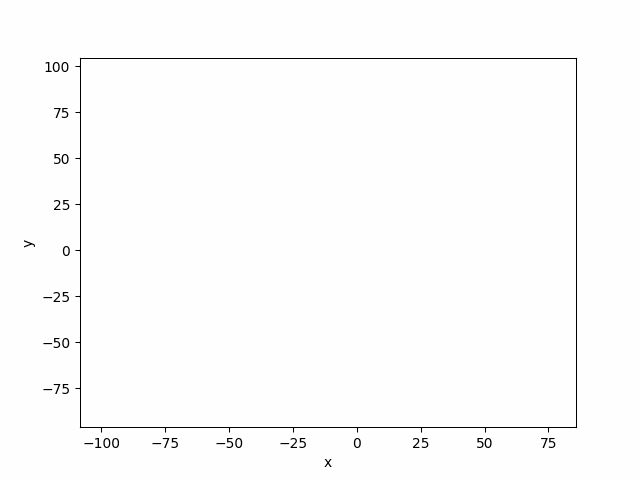

In [19]:
vi.show_gif(interval=200)

#### Zbiór danych A

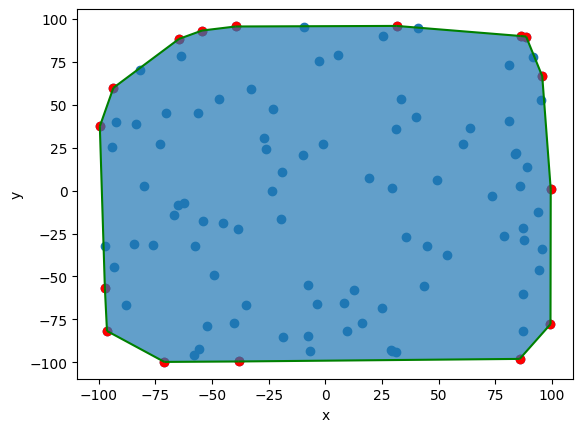

In [20]:
visualize_graham(points_a)

#### Zbiór danych B

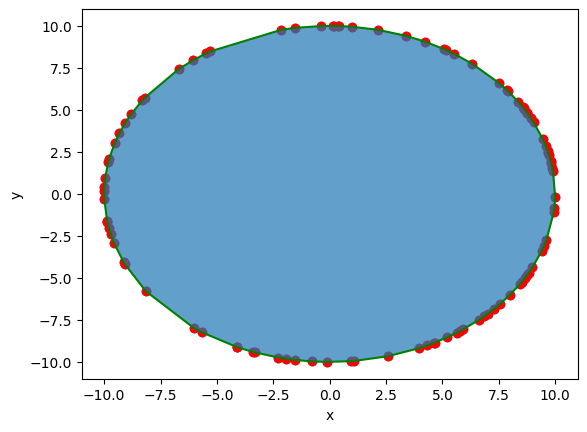

In [21]:
visualize_graham(points_b)

#### Zbiór danych C

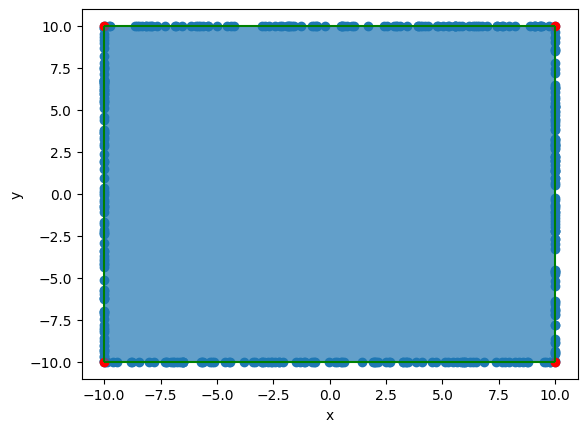

In [22]:
visualize_graham(points_c)

#### Zbiór danych D

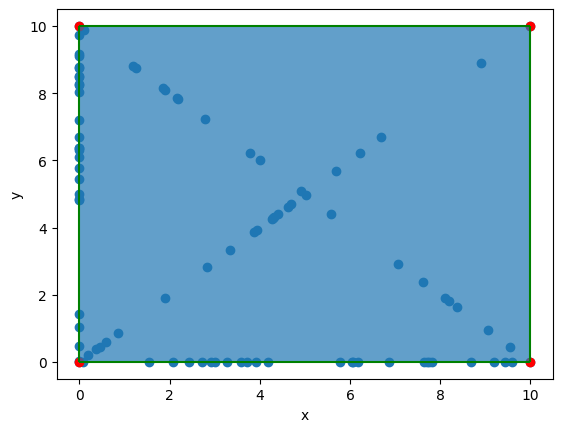

In [23]:
visualize_graham(points_d)

## Algorytm Jarvisa

In [24]:
def jarvis_algorithm(points):
    '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów points algorymem Jarvisa
    :parm points: zbiór punktów
    :return: tablica punktów w postaci krotek współrzędnych
    '''

    res = []
    a =  min(points, key = lambda point: point[0])
    index = points.index(a)
    
    l = index
    res = []
    res.append(a)
    while (True):
        q = (l + 1) % len(points)
        dist_l_q = distance_squared(points[q], points[l])

        for i in range(len(points)):
            if i == l:
                continue
            d = direction(points[l], points[i], points[q])
            if d > 0 or (d >= 0 and d < 1**-16 and distance_squared(points[i], points[l]) > dist_l_q):
                q = i

        l = q
        if l == index:
            return res
        res.append(points[q])


In [25]:
def jarvis_algorithm_draw(points):
    '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów points algorymem Jarvisa oraz 
    pokazuje poszczególne kroki algorymu
    :parm points: zbiór punktów
    :return: krotka w postaci  (tablica punktów w postaci krotek współrzędnych,
                                wizualizer pokazujący kroki algorytmu) 
    '''
    vis.clear()
    vis.add_point(points)

    res = []
    a =  min(points, key = lambda point: point[0])
    index = points.index(a)
    
    l = index
    res = []
    res.append(a)
    vis.add_point([a], color='red')
    while (True):

        q = (l + 1) % len(points)
        dist_l_q = distance_squared(points[q], points[l])

        rm, rm_or = [], []
        for i in range(len(points)):
            if i == l:
                continue

            rm = vis.add_line_segment((points[i], res[-1]), color = 'pink')
            d = direction(points[l], points[i], points[q])

            if d > 0 or (d>0 and d < 1**-18 and distance_squared(points[i], points[l]) > dist_l_q):
                if rm_or: vis.remove_figure(rm_or)
                
                rm_or = vis.add_line_segment((points[i], res[-1]), color = 'orange')
                q = i


            if rm: vis.remove_figure(rm)


        l = q
        if l == index:
            vis.add_line_segment((res[-1], res[0]), color='green')
            pol1 = vis.add_polygon(res, alpha=0.7)
            pol2 = vis.add_polygon(res, alpha=0.1)
            for j in range(30):
                p = vis.add_point([res[-1]], color = 'red')
                vis.remove_figure(p)
            return res, vis
        res.append(points[q])
        vis.add_line_segment((res[-1], res[-2]), color='green')
        vis.add_point([points[q]], color='red')


In [26]:
def visualize_jarvis(test_points):
    result = jarvis_algorithm(test_points)
    vis.clear()
    vis.add_point(test_points)
    vis.add_point(result, color = 'red')
    vis.add_line_segment([(result[i], result[i+1]) for i in range(len(result)-1)], color = 'green')
    vis.add_line_segment([result[-1], result[0]], color='green')
    vis.add_polygon(result, alpha=0.7)
    vis.show()

Zwizualizuj swoją implementację algorytmu.

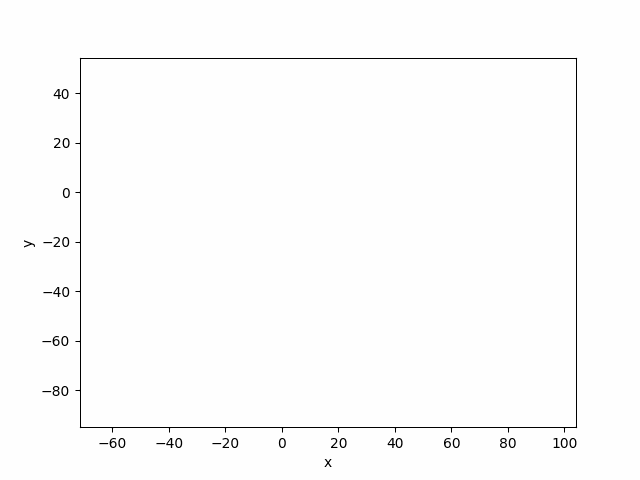

In [27]:
np.random.seed(123)
test_points = generate_uniform_points(n = 10)
result, vis_jarvis = jarvis_algorithm_draw(test_points)
vis_jarvis.show_gif(interval=100)

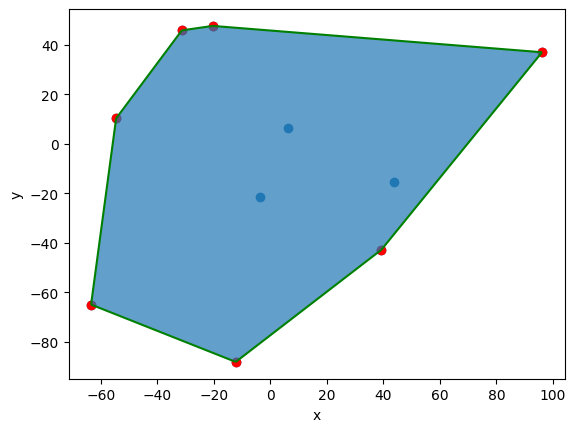

In [30]:
visualize_jarvis(test_points)

#### Zbiór danych A

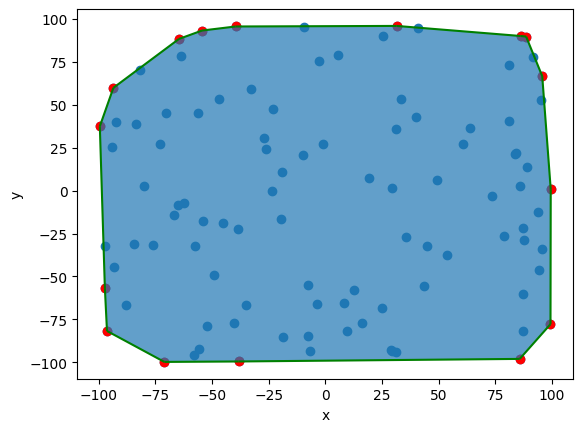

In [31]:
visualize_jarvis(points_a)

#### Zbiór danych B

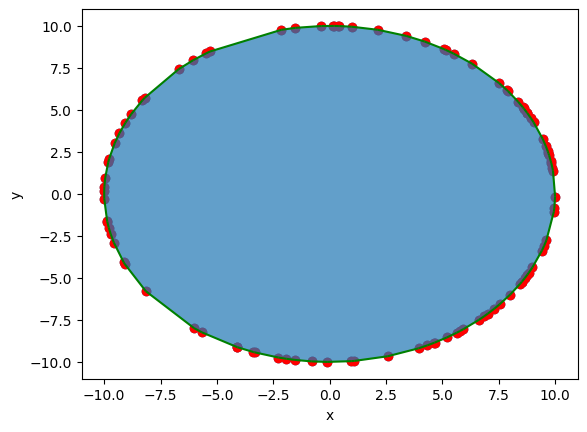

In [32]:
visualize_jarvis(points_b)

#### Zbiór danych C

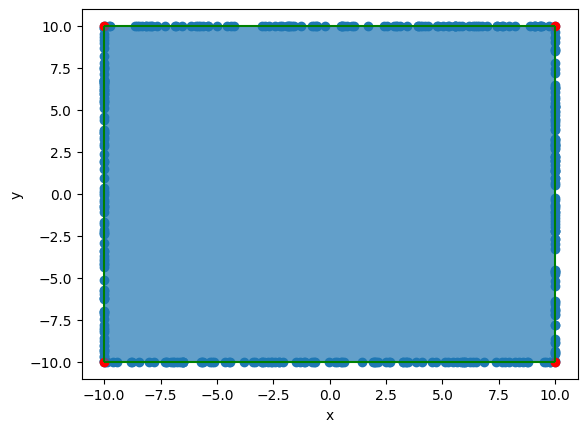

In [33]:
visualize_jarvis(points_c)

#### Zbiór danych D

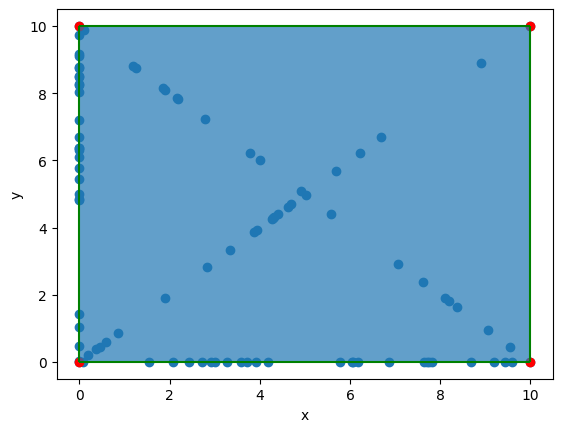

In [34]:
visualize_jarvis(points_d)

### 

## Porównanie czasów

In [35]:
np.random.seed(123)

In [36]:
from time import time
times = [[] for _ in range(4)]
def measure(func, arg):
    st = time()
    func(arg)
    end = time()
    return end-st

#### Zbiór a

In [37]:
left = [10**i for i in range(2,7)]
amount = [10**i for i in range(2,7)]
for i in range(len(left)):
    test = generate_uniform_points(-left[i], left[i], amount[i])
    times[0].append(measure(graham_algorithm,test))
    times[0].append(measure(jarvis_algorithm, test))

In [38]:
a_spec = [left, amount]

#### Zbiór b

In [80]:
left = [10**i for i in range(1,5)]
amount = [10**i for i in range(1,5)]
for i in range(len(left)):
    test = generate_circle_points((0,0), left[i], amount[i])
    times[1].append(measure(graham_algorithm,test))
    times[1].append(measure(jarvis_algorithm, test))

In [81]:
b_spec = [left, amount]

#### Zbiór c

In [91]:
left = [10**i for i in range(1,6)]
amount = [10**i for i in range(1,6)]
for i in range(len(left)):
    a = (-left[i], -left[i])
    b = (left[i], -left[i])
    c = (left[i], left[i])
    d = (-left[i], left[i])
    test = generate_rectangle_points(a, b,c,d, amount[i])
    times[2].append(measure(graham_algorithm,test))
    times[2].append(measure(jarvis_algorithm, test))

In [92]:
c_spec = [left, amount]

#### Zbiór d

In [43]:
left = [10**i for i in range(2,7)]
amount = [10**i for i in range(2,7)]
for i in range(len(left)):
    a = (-left[i], -left[i])
    b = (left[i], -left[i])
    c = (left[i], left[i])
    d = (-left[i], left[i])
    test = generate_square_points(a, b,c,d, amount[i])
    times[3].append(measure(graham_algorithm,test))
    times[3].append(measure(jarvis_algorithm, test))

In [44]:
d_spec = [left, amount]

#### Analiza wyników

In [77]:
# times[1] = []

In [89]:
datae = {}
algorytm = ["Graham", "Jarvis"]
# datae["Zestaw"] = ["Zestaw {}".format(letter) for letter in ['a', 'b', 'c', 'd']] * 2
datae["Algorytm"] = algorytm

def gen(spec, test_set):
    for i in range(len(spec[0])):
        datae[spec[1][i]] = [round(times[test_set][i * 2], 3), round(times[test_set][2*i + 1], 3)]

gen(b_spec , 1)

df = pd.DataFrame(data = datae)
df

,Algorytm,10,100,1000,10000
0,Graham,0.0,0.002,0.023,0.132
1,Jarvis,0.0,0.033,0.727,77.841


In [94]:
spec = [a_spec, b_spec, c_spec, d_spec]
times

[[0.0005893707275390625,
  0.0005006790161132812,
  0.007127523422241211,
  0.01019287109375,
  0.08750700950622559,
  0.10708951950073242,
  1.2220854759216309,
  1.7707273960113525,
  15.013105869293213,
  25.266388654708862],
 [0.00019884109497070312,
  0.00032138824462890625,
  0.0023965835571289062,
  0.03295278549194336,
  0.02292346954345703,
  0.7272202968597412,
  0.13237595558166504,
  77.84130191802979],
 [0.00029969215393066406,
  0.0001418590545654297,
  0.0037729740142822266,
  0.0011968612670898438,
  0.0562436580657959,
  0.010904788970947266,
  0.7590024471282959,
  0.11707210540771484,
  9.165144920349121,
  1.253824234008789],
 [0.0015366077423095703,
  0.0007996559143066406,
  0.026697397232055664,
  0.011160135269165039,
  0.2120823860168457,
  0.07677173614501953,
  2.8156211376190186,
  0.9206950664520264,
  37.919477462768555,
  9.709136724472046]]